In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])

In [5]:
df['timestamp'] = pd.to_datetime('now')

c:\Users\Yamin Hossain\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [6]:
import os
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    # df2 = pd.json_normalize(data['data'])
    # df2['Timestamp'] = pd.to_datetime('now')
    # df = df.append(df2)


    #Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r"C:\Users\Yamin Hossain\Documents\Coinmarketcap.csv"):
        df.to_csv(r"C:\Users\Yamin Hossain\Documents\Coinmarketcap.csv", header='column_names')
    else:
        df.to_csv(r"C:\Users\Yamin Hossain\Documents\Coinmarketcap.csv", mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video



In [7]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

c:\Users\Yamin Hossain\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


KeyboardInterrupt: 

In [8]:
df = pd.read_csv(r"C:\Users\Yamin Hossain\Documents\Coinmarketcap.csv")

In [10]:
df# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [11]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9996,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000,19307106.000,19307106.000,NaN,1,NaN,NaN,NaN,2023-03-03T17:11:00.000Z,22402.988,26045882986.518,23.655,0.126,-3.818,-3.322,-2.542,33.968,32.116,432536873412.111,42.059,470462758201.790,NaN,2023-03-03T17:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-03 17:12:44.885237
1,1,1027,Ethereum,ETH,ethereum,6517,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.218,122373866.218,NaN,2,NaN,NaN,NaN,2023-03-03T17:11:00.000Z,1571.416,9765397494.464,38.849,0.151,-3.343,-1.321,-0.159,29.065,23.795,192300229006.759,18.700,192300229006.760,NaN,2023-03-03T17:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-03 17:12:44.885237
2,2,825,Tether,USDT,tether,48731,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,71116628508.946,73141766321.234,NaN,3,NaN,NaN,NaN,2023-03-03T17:11:00.000Z,1.000,37545462837.252,26.108,-0.001,0.001,-0.000,-0.002,0.031,0.003,71124146549.007,6.916,73149498447.190,NaN,2023-03-03T17:11:00.000Z,1027.000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-03 17:12:44.885237
3,3,1839,BNB,BNB,bnb,1206,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157894579.010,159979963.590,NaN,4,NaN,NaN,NaN,2023-03-03T17:11:00.000Z,289.674,459494522.081,24.273,0.215,-2.579,-3.678,-5.919,17.536,-0.510,45737985781.984,4.449,46342067891.080,NaN,2023-03-03T17:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-03 17:12:44.885237
4,4,3408,USD Coin,USDC,usd-coin,10437,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,43228214266.551,43228214266.551,NaN,5,NaN,NaN,NaN,2023-03-03T17:11:00.000Z,1.000,4167008741.830,16.420,0.016,-0.024,0.027,0.019,0.011,0.020,43231701036.501,4.204,43231701036.500,NaN,2023-03-03T17:11:00.000Z,1027.000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-03 17:12:44.885237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,10,5426,Solana,SOL,solana,437,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,378850891.642,539312704.888,NaN,11,NaN,NaN,NaN,2023-03-03T17:20:00.000Z,21.248,478904481.874,44.523,0.065,-2.366,-6.890,-6.723,90.676,56.911,8050001306.085,0.782,11459569119.450,NaN,2023-03-03T17:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-03 17:22:25.093322
101,11,6636,Polkadot,DOT,polkadot-new,475,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1162800965.752,1289224636.057,NaN,12,904869778.000,5493078427.885,NaN,2023-03-03T17:20:00.000Z,6.071,293457498.323,33.610,0.347,-3.212,-8.457,-0.144,34.956,9.200,7058868641.867,0.686,7826332815.180,NaN,2023-03-03T17:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-03 17:22:25.093322
102,12,2,Litecoin,LTC,litecoin,881,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.000,72401614.839,84000000.000,NaN,13,NaN,NaN,NaN,2023-03-03T17:20:00.000Z,89.752,660683401.309,43.107,0.344,-4.813,-1.517,-4.959,20.198,17.523,6498196396.769,0.632,7539175728.940,NaN,2023-03-03T17:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-03 17:22:25.093322
103,13,5994,Shiba Inu,SHIB,shiba-inu,490,2020-08-01T00:00:00.000Z,"['memes', 

In [18]:


# Now let's look at the coin trends over time

df = df.groupby('name', sort=True)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df



,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
BNB,0.297,-2.531,-3.654,-5.999,17.574,-0.590
Binance USD,0.004,-0.009,0.017,0.021,0.014,0.008
Bitcoin,0.205,-3.751,-3.315,-2.557,34.018,32.140
Cardano,0.551,-2.093,-7.005,-9.483,33.322,4.757
Dogecoin,0.351,-4.560,-5.662,-15.079,6.058,-24.569
Ethereum,0.203,-3.302,-1.325,-0.212,29.084,23.822
Litecoin,0.320,-4.851,-1.515,-4.892,20.114,17.559
Polkadot,0.396,-3.203,-8.343,-0.039,34.773,9.287
Polygon,0.674,-2.031,-8.006,8.609,49.784,27.377


In [19]:


df2 = df.stack()
df2



name                              
BNB   quote.USD.percent_change_1h     0.297
      quote.USD.percent_change_24h   -2.531
      quote.USD.percent_change_7d    -3.654
      quote.USD.percent_change_30d   -5.999
      quote.USD.percent_change_60d   17.574
                                      ...  
XRP   quote.USD.percent_change_24h   -2.114
      quote.USD.percent_change_7d    -1.945
      quote.USD.percent_change_30d   -7.865
      quote.USD.percent_change_60d    4.269
      quote.USD.percent_change_90d   -6.848
Length: 90, dtype: float64

In [20]:
type(df2)

pandas.core.series.Series

In [21]:
type(df)

pandas.core.frame.DataFrame

In [22]:
df3 = df2.to_frame(name='values')
df3

values
name                                     
BNB  quote.USD.percent_change_1h    0.297
     quote.USD.percent_change_24h  -2.531
     quote.USD.percent_change_7d   -3.654
     quote.USD.percent_change_30d  -5.999
     quote.USD.percent_change_60d  17.574
...                                   ...
XRP  quote.USD.percent_change_24h  -2.114
     quote.USD.percent_change_7d   -1.945
     quote.USD.percent_change_30d  -7.865
     quote.USD.percent_change_60d   4.269
     quote.USD.percent_change_90d  -6.848

[90 rows x 1 columns]

In [24]:
df3.count()

values    90
dtype: int64

In [28]:
df4 = df3.reset_index()
df4

,name,level_1,values
0,BNB,quote.USD.percent_change_1h,0.297
1,BNB,quote.USD.percent_change_24h,-2.531
2,BNB,quote.USD.percent_change_7d,-3.654
3,BNB,quote.USD.percent_change_30d,-5.999
4,BNB,quote.USD.percent_change_60d,17.574
...,...,...,...
85,XRP,quote.USD.percent_change_24h,-2.114
86,XRP,quote.USD.percent_change_7d,-1.945
87,XRP,quote.USD.percent_change_30d,-7.865
88,XRP,quote.USD.percent_change_60d,4.269


In [31]:
df4 = df4.rename(columns={'level_1':'percent_change'})
df4

,name,percent_change,values
0,BNB,quote.USD.percent_change_1h,0.297
1,BNB,quote.USD.percent_change_24h,-2.531
2,BNB,quote.USD.percent_change_7d,-3.654
3,BNB,quote.USD.percent_change_30d,-5.999
4,BNB,quote.USD.percent_change_60d,17.574
...,...,...,...
85,XRP,quote.USD.percent_change_24h,-2.114
86,XRP,quote.USD.percent_change_7d,-1.945
87,XRP,quote.USD.percent_change_30d,-7.865
88,XRP,quote.USD.percent_change_60d,4.269


In [33]:


df4['percent_change'] = df4['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df4



,name,percent_change,values
0,BNB,1h,0.297
1,BNB,24h,-2.531
2,BNB,7d,-3.654
3,BNB,30d,-5.999
4,BNB,60d,17.574
...,...,...,...
85,XRP,24h,-2.114
86,XRP,7d,-1.945
87,XRP,30d,-7.865
88,XRP,60d,4.269


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

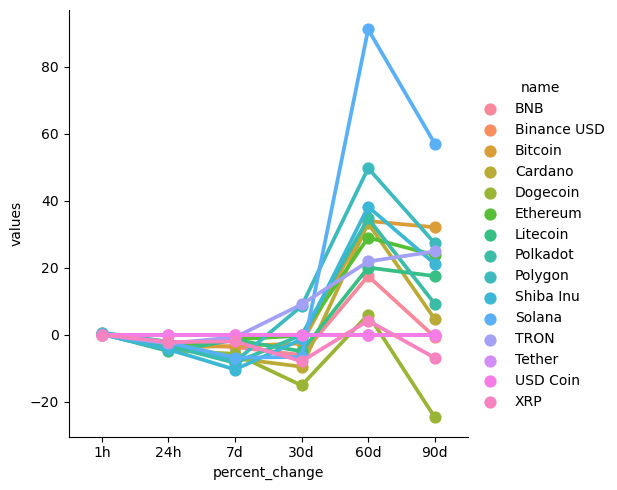

In [35]:
sns.catplot(x='percent_change', y='values', hue='name', data=df4, kind='point')